Data type: uint8
Min. value: 0
Max. value: 255
shape: (480, 720, 3)


<>:14: SyntaxWarning: invalid escape sequence '\P'
<>:14: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Leony\AppData\Local\Temp\ipykernel_27804\3610590578.py:14: SyntaxWarning: invalid escape sequence '\P'
  im = io.imread('D:\PCM\ETS\DATASET\eczema-subacute-35-NoWM.jpeg')


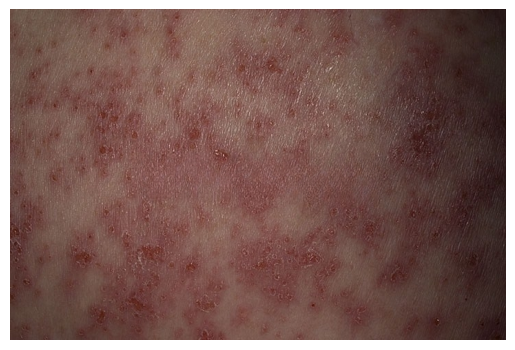

In [41]:


# Deklarasi Library

import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from skimage import io, color, img_as_ubyte, exposure, img_as_float, morphology, filters, measure
from pandas import DataFrame
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage.draw import ellipse
import math
import pandas as pd

im = io.imread('D:\PCM\ETS\DATASET\eczema-subacute-35-NoWM.jpeg')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max. value:', im.max())
print('shape:', im.shape)


plt.imshow(im)
plt.axis('off')
plt.show()

<class 'numpy.ndarray'>
uint8
(480, 720)
4 237


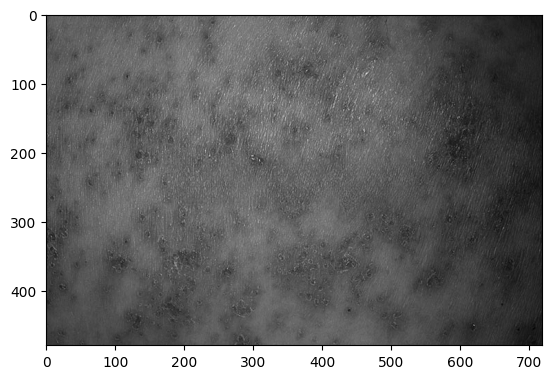

In [42]:
# cara singkat state kernel atau weight

weights = np.full((3,3), 1/9)
weights

# Transformasi dari RGB ke Gray
img = color.rgb2gray(im)
img = img_as_ubyte(img)  #convert tipe data to uint8

# Untuk cek tipe data image
print(type(img)) 
print(img.dtype)
print(img.shape)
print(img.min(), img.max()) # Rentang image

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Histogram of gray values')

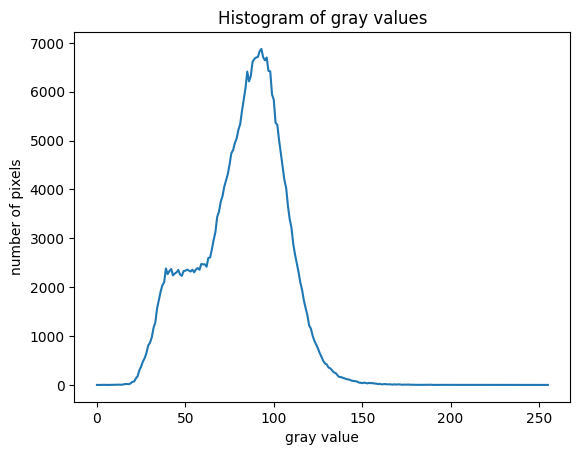

In [43]:
histogram = ndi.histogram(img, min=0, max=255, bins=256)

#histogram = exposure.histogram(phase_separation)
plt.plot(histogram)
plt.xlabel('gray value')
plt.ylabel('number of pixels')
plt.title('Histogram of gray values')

C:\Users\Leony\AppData\Local\Temp\ipykernel_27804\558058900.py:3: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (480, 720, 3) looks like that of an RGB image.
  threshold = filters.threshold_otsu(im) #deteksi otomatis nilai threshold yg pas


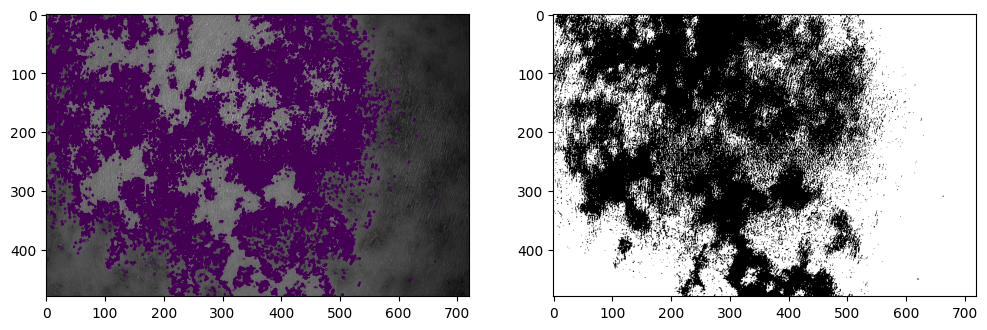

In [44]:
# Otsu

threshold = filters.threshold_otsu(im) #deteksi otomatis nilai threshold yg pas
threshold

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(img, cmap='gray')
ax[0].contour(img, [threshold]) #contour pada daerah threshold
ax[1].imshow(img < threshold, cmap='gray')

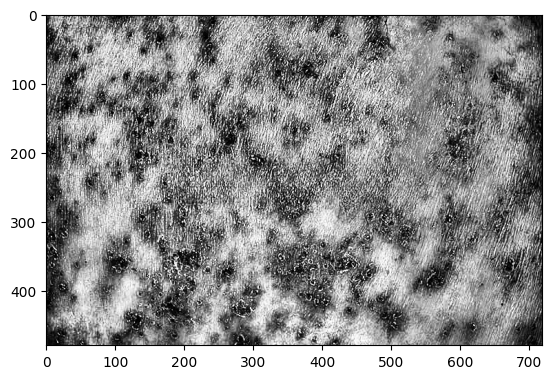

In [45]:
# Adaptive Histogram Equalization

img_hieq = exposure.equalize_adapthist(img, clip_limit=0.9)*255 # Biasanya 0.01
img_hieq = img_hieq.astype('uint8')

plt.imshow(img_hieq, cmap='gray')

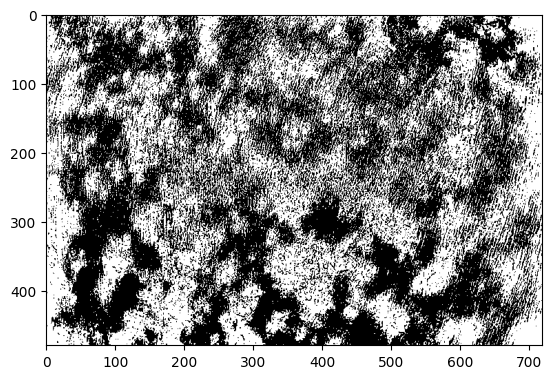

In [46]:
# Otsu thresholding

binary_image = img_hieq < filters.threshold_otsu(img_hieq)
plt.imshow(binary_image, cmap='gray')

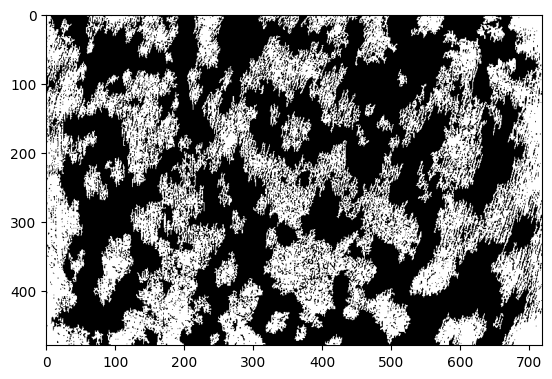

In [47]:
#Remove small objects
only_large_blobs = morphology.remove_small_objects(binary_image, min_size=100)
plt.imshow(only_large_blobs, cmap='gray')

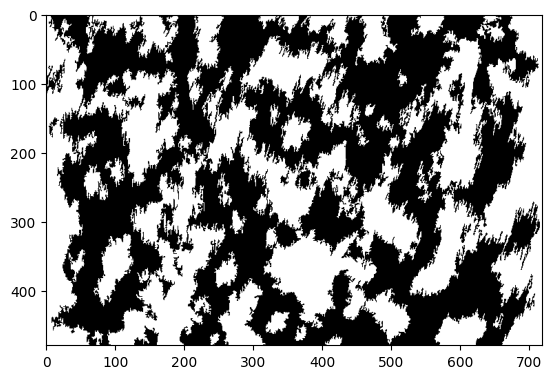

In [48]:
#Fill small holes
only_large = np.logical_not(morphology.remove_small_objects(
                                    np.logical_not(only_large_blobs), 
                                                   min_size=100))
image_segmented = only_large
plt.imshow(image_segmented, cmap='gray')


<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Leony\AppData\Local\Temp\ipykernel_27804\3836785483.py:30: SyntaxWarning: invalid escape sequence '\s'
  ax[1,1].set_title('Canny $\sigma=1$', size=15)


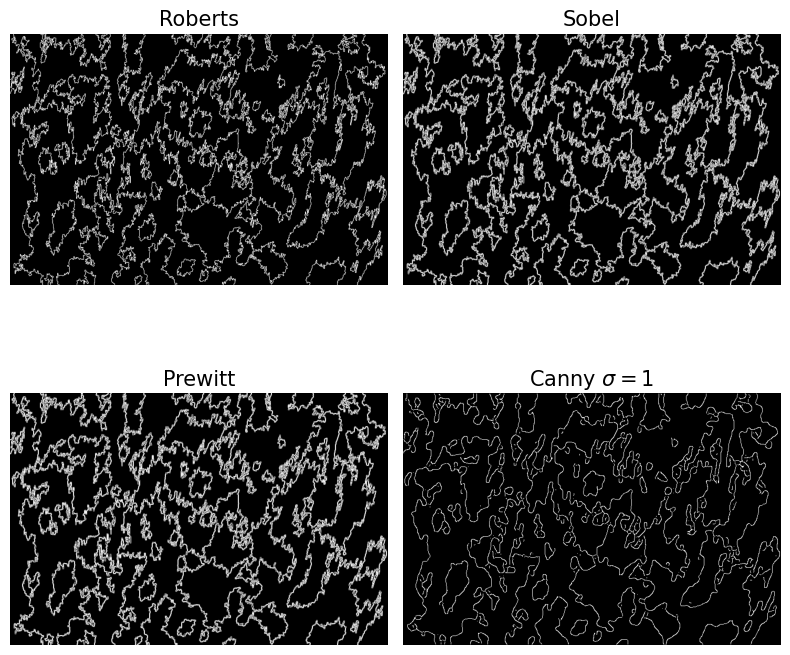

In [49]:
from skimage import feature, filters

# im = med

roberts = filters.roberts(image_segmented)
sobel = filters.sobel(image_segmented)
prewitt = filters.prewitt(image_segmented)
canny = feature.canny(image_segmented, sigma=3)
canny_image = canny

# for i in [roberts,sobel,prewitt,canny]:
#     print('dtype: ',i.dtype)

# print('\n')
# for i in [roberts,sobel,prewitt,canny]:
#     i = i.astype('uint8')
#     print('dtype: ',i.dtype)

fig, ax = plt.subplots(2,2,figsize=(8, 8))
ax[0,0].imshow(roberts, cmap='gray')
ax[0,0].set_title('Roberts', size=15)

ax[0,1].imshow(sobel, cmap='gray')
ax[0,1].set_title('Sobel', size=15)

ax[1,0].imshow(prewitt, cmap='gray')
ax[1,0].set_title('Prewitt', size=15)

ax[1,1].imshow(canny, cmap='gray')
ax[1,1].set_title('Canny $\sigma=1$', size=15)



for a in ax.flat:
    a.axis('off')

plt.tight_layout()
plt.show()


In [50]:
# imots = img_as_ubyte(imots)  #convert tipe data to uint8
image_segmented = img_as_ubyte(image_segmented)  #convert tipe data to uint8

# Untuk cek tipe data image
print(type(image_segmented)) 
print(image_segmented.dtype)
print(image_segmented.shape)
print(image_segmented.min(), image_segmented.max()) # Rentang image

<class 'numpy.ndarray'>
uint8
(480, 720)
0 255


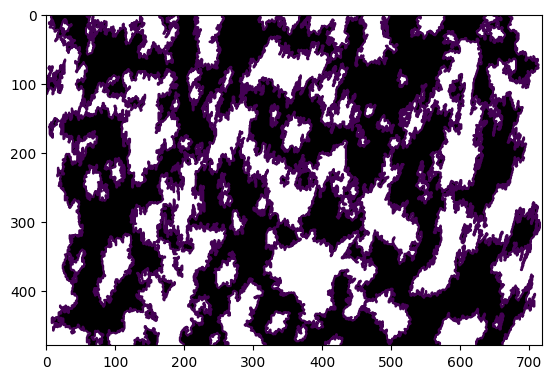

In [51]:
plt.imshow(image_segmented, cmap='gray')
plt.contour(image_segmented, [threshold])

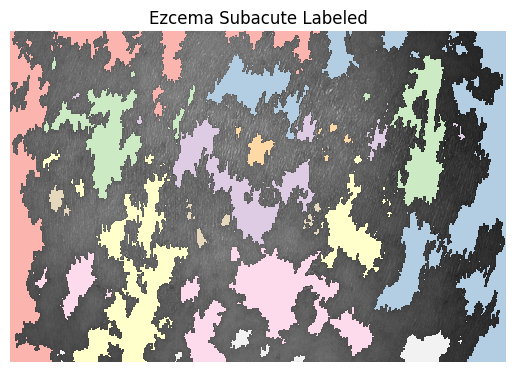

In [ ]:
lab_image = image_segmented

# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))
labels, nlabels = ndi.label(lab_image)

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(img, cmap='gray')
plt.imshow(labels_for_display, cmap='rand_cmap')
plt.axis('off')
plt.title('Ezcema Subacute Labeled'.format(nlabels))
plt.show()


In [53]:
import numpy as np
import scipy.ndimage as ndi

# Melakukan labeling pada gambar
boxes = ndi.find_objects(labels)
for label_ind, label_coords in enumerate(boxes):
    if label_coords is None:
        continue  # Jika label tidak valid, lewati

    cell = lab_image[label_coords]
    
    # Filter objek berdasarkan ukuran
    cell_size = np.prod(cell.shape)

    if cell_size < 5000: 
        print(f'Label {label_ind} is too small! Setting to 0.')
        lab_image = np.where(labels == label_ind + 1, 0, lab_image)
    # Uncomment jika ingin memfilter objek yang terlalu besar
    # elif cell_size > 75000: 
    #     print(f'Label {label_ind} is too big! Setting to 0.')
    #     lab_image = np.where(labels == label_ind + 1, 0, lab_image)

# Regenerate the labels
labels, nlabels = ndi.label(lab_image)
print(f'There are now {nlabels} separate components / objects detected.')


Label 1 is too small! Setting to 0.
Label 2 is too small! Setting to 0.
Label 3 is too small! Setting to 0.
Label 5 is too small! Setting to 0.
Label 7 is too small! Setting to 0.
Label 8 is too small! Setting to 0.
Label 9 is too small! Setting to 0.
Label 11 is too small! Setting to 0.
Label 12 is too small! Setting to 0.
Label 14 is too small! Setting to 0.
Label 16 is too small! Setting to 0.
Label 17 is too small! Setting to 0.
Label 19 is too small! Setting to 0.
Label 20 is too small! Setting to 0.
Label 21 is too small! Setting to 0.
Label 22 is too small! Setting to 0.
Label 23 is too small! Setting to 0.
Label 25 is too small! Setting to 0.
Label 26 is too small! Setting to 0.
Label 27 is too small! Setting to 0.
Label 28 is too small! Setting to 0.
Label 29 is too small! Setting to 0.
Label 30 is too small! Setting to 0.
Label 31 is too small! Setting to 0.
Label 32 is too small! Setting to 0.
Label 33 is too small! Setting to 0.
Label 34 is too small! Setting to 0.
Label 35

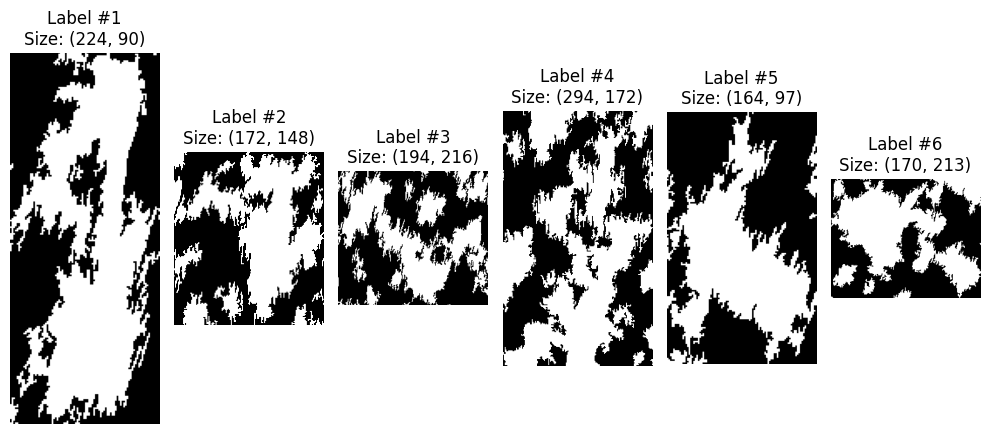

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10,6))

for ii, obj_indices in enumerate(ndi.find_objects(labels)[5:11]):
    cell = image_segmented[obj_indices]
    axes[ii].imshow(cell, cmap='gray')
    axes[ii].axis('off')
    axes[ii].set_title('Label #{}\nSize: {}'.format(ii+1, cell.shape))

plt.tight_layout()
plt.show()

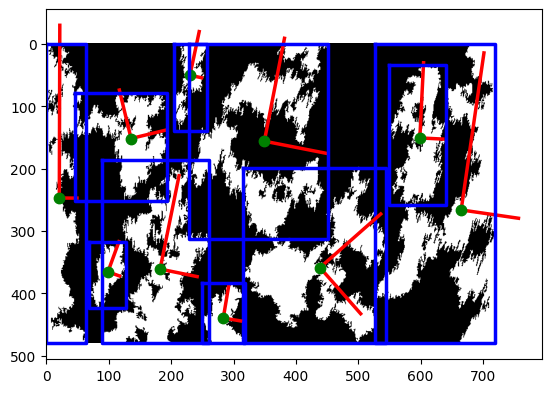

In [55]:
image = lab_image

label_img = label(image)
regions = regionprops(label_img)
label_img

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

# ax.axis((0, 600, 600, 0))
plt.show()

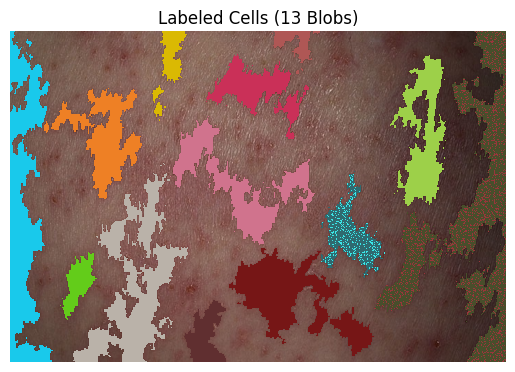

In [56]:
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(im, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Blobs)'.format(nlabels))
plt.show()


In [57]:
from skimage.measure import regionprops_table
from datetime import datetime

props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))

# Convert the properties to a DataFrame
df1 = pd.DataFrame(props)

# Generate a unique filename with timestamp in the Downloads folder
#timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = rf"D:\PCM\ETS\extract features.xlsx"  # 'r' makes it a raw string

# Save to Excel with a new filename each time
df1.to_excel(file_path, sheet_name='Ektraksi_fitur_ezcema_1')

print(f"Features extracted and saved to: {file_path}")

Features extracted and saved to: D:\PCM\ETS\extract features.xlsx
